In [296]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from functools import reduce
import numpy as np
from sklearn.decomposition import NMF
import pickle
%matplotlib inline

In [297]:
csv_list = ['links', 'movies', 'ratings']

dfs= []
for item in csv_list: 
    dfs.append(pd.read_csv(f'/Users/dinakats/Desktop/SPICED/Recommender/raw_data/ml-latest-small/{item}.csv', engine='python'))

In [298]:
dfs

[      movieId   imdbId    tmdbId
 0           1   114709     862.0
 1           2   113497    8844.0
 2           3   113228   15602.0
 3           4   114885   31357.0
 4           5   113041   11862.0
 ...       ...      ...       ...
 9737   193581  5476944  432131.0
 9738   193583  5914996  445030.0
 9739   193585  6397426  479308.0
 9740   193587  8391976  483455.0
 9741   193609   101726   37891.0
 
 [9742 rows x 3 columns],
       movieId                                      title  \
 0           1                           Toy Story (1995)   
 1           2                             Jumanji (1995)   
 2           3                    Grumpier Old Men (1995)   
 3           4                   Waiting to Exhale (1995)   
 4           5         Father of the Bride Part II (1995)   
 ...       ...                                        ...   
 9737   193581  Black Butler: Book of the Atlantic (2017)   
 9738   193583               No Game No Life: Zero (2017)   
 9739   193585 

In [299]:
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['movieId'], how='inner'), dfs)

In [300]:
df_merged.set_index(['movieId'], inplace = True)

In [301]:
df_merged[df_merged.userId==610]

,imdbId,tmdbId,title,genres,userId,rating,timestamp
movieId,,,,,,,
1,114709,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,610,5.0,1479542900
6,113277,949.0,Heat (1995),Action|Crime|Thriller,610,5.0,1493850345
16,112641,524.0,Casino (1995),Crime|Drama,610,4.5,1479542171
32,114746,63.0,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller,610,4.5,1479543331
47,114369,807.0,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,610,5.0,1479545853
...,...,...,...,...,...,...,...
166534,4972582,381288.0,Split (2017),Drama|Horror|Thriller,610,4.0,1493848402
168248,4425200,324552.0,John Wick: Chapter Two (2017),Action|Crime|Thriller,610,5.0,1493850091
168250,5052448,419430.0,Get Out (2017),Horror,610,5.0,1494273047


In [302]:
df_merged.dtypes

imdbId         int64
tmdbId       float64
title         object
genres        object
userId         int64
rating       float64
timestamp      int64
dtype: object

In [303]:
counts = df_merged.groupby('title').agg({'rating': 'mean', 'userId':'count'})
counts.sort_values(['userId','rating'], ascending=[False, False])

,rating,userId
title,,
Forrest Gump (1994),4.164134,329
"Shawshank Redemption, The (1994)",4.429022,317
Pulp Fiction (1994),4.197068,307
"Silence of the Lambs, The (1991)",4.161290,279
"Matrix, The (1999)",4.192446,278
...,...,...
"Wasp Woman, The (1959)",0.500000,1
While the City Sleeps (1956),0.500000,1
Wizards of the Lost Kingdom II (1989),0.500000,1


In [304]:
counts[(counts.rating < 2.5)& (counts.userId>40)]

,rating,userId
title,,
Batman & Robin (1997),2.214286,42
Coneheads (1993),2.420635,63
"Flintstones, The (1994)",2.357143,42
Striptease (1996),2.414634,41
Wild Wild West (1999),2.207547,53


In [305]:
df_merged.reset_index(inplace=True)

In [306]:
df_merged

,movieId,imdbId,tmdbId,title,genres,userId,rating,timestamp
0,1,114709,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,114709,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,114709,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,114709,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,114709,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483
...,...,...,...,...,...,...,...,...
100831,193581,5476944,432131.0,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,184,4.0,1537109082
100832,193583,5914996,445030.0,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,184,3.5,1537109545
100833,193585,6397426,479308.0,Flint (2017),Drama,184,3.5,1537109805
100834,193587,8391976,483455.0,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,184,3.5,1537110021


In [307]:
dfs[1][['movieId','title']]

,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)
...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017)
9738,193583,No Game No Life: Zero (2017)
9739,193585,Flint (2017)
9740,193587,Bungo Stray Dogs: Dead Apple (2018)


In [308]:
movieId_toname= dfs[1].set_index('movieId').to_dict()

In [309]:
movieId_toname['title'][193587]

'Bungo Stray Dogs: Dead Apple (2018)'

In [310]:
adj = df_merged.set_index(['movieId', 'userId']).unstack()

In [311]:
adj = adj['rating']

In [312]:
adj = adj.T

In [313]:
adj

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,4.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,2.5,NaN,NaN,NaN,NaN,NaN,2.5,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
607,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
608,2.5,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


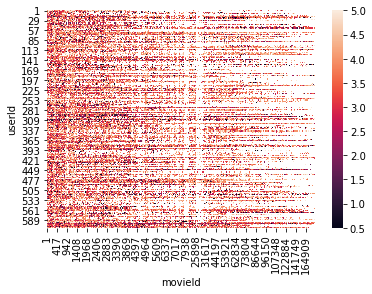

In [25]:
sns.heatmap(adj)

In [314]:
#change movieid names 
adj.rename(columns = movieId_toname['title'], inplace=True)

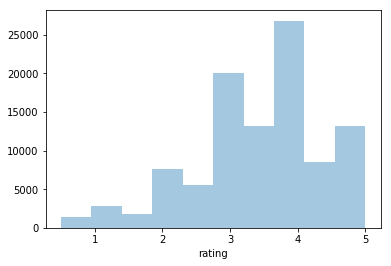

In [27]:
#histogram of ratings
sns.distplot(df_merged.rating, bins=10, kde=False)

In [28]:
#split the histograms by genre

In [315]:
df_merged.genres.value_counts() #maybe just split into comedy, drama, action

Comedy                                          7196
Drama                                           6291
Comedy|Romance                                  3967
Comedy|Drama|Romance                            3000
Comedy|Drama                                    2851
                                                ... 
Animation|Comedy|Horror|Musical                    1
Comedy|Crime|Drama|Horror                          1
Comedy|Crime|Horror|Mystery|Thriller               1
Drama|Fantasy|Horror|Mystery|Sci-Fi|Thriller       1
Action|Comedy|Drama|Romance                        1
Name: genres, Length: 951, dtype: int64

In [316]:
df_merged['main_genre']=np.select(
    [df_merged['genres']==('Comedy|Drama'),
     df_merged['genres'].str.contains('Comedy'), 
     df_merged['genres'].str.contains('Drama'), 
     df_merged['genres'].str.contains('Action')],
    ['Dramedy','Comedy','Drama','Action'], default='null')



In [317]:
df_merged[df_merged.main_genre=='null']

,movieId,imdbId,tmdbId,title,genres,userId,rating,timestamp,main_genre
215,2,113497,8844.0,Jumanji (1995),Adventure|Children|Fantasy,6,4.0,845553522,null
216,2,113497,8844.0,Jumanji (1995),Adventure|Children|Fantasy,8,4.0,839463806,null
217,2,113497,8844.0,Jumanji (1995),Adventure|Children|Fantasy,18,3.0,1455617462,null
218,2,113497,8844.0,Jumanji (1995),Adventure|Children|Fantasy,19,3.0,965704331,null
219,2,113497,8844.0,Jumanji (1995),Adventure|Children|Fantasy,20,3.0,1054038313,null
...,...,...,...,...,...,...,...,...,...
100818,190183,4073790,445651.0,The Darkest Minds (2018),Sci-Fi|Thriller,50,3.5,1533302021,null
100823,190219,179011,48610.0,Bunny (1998),Animation,338,1.0,1530148473,null
100824,190221,3333182,460631.0,Hommage à Zgougou (et salut à Sabine Mamou) (2...,Documentary,338,1.0,1530148473,null
100829,193573,3837248,333623.0,Love Live! The School Idol Movie (2015),Animation,184,4.0,1537099811,null


In [318]:
df_merged.movieId.value_counts()

356       329
318       317
296       307
593       279
2571      278
         ... 
5922        1
153386      1
57147       1
5986        1
8196        1
Name: movieId, Length: 9724, dtype: int64

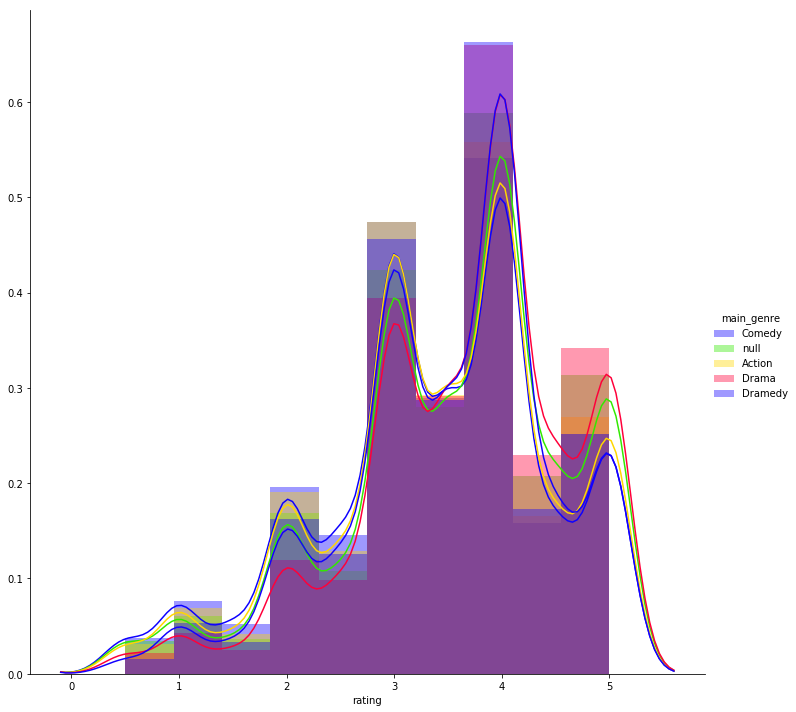

In [319]:

g = sns.FacetGrid(df_merged, hue="main_genre", height = 10, palette='prism')
g = g.map(sns.distplot, "rating", bins=10, kde = True, kde_kws = {'bw':.2})
g.add_legend(title='main_genre') #legend doesn't appear to be doing much

In [24]:
#try just fillin in with zeros for the imputation
adj_zeros = adj.fillna(0)

In [25]:
adj_zeros.columns

Index(['Toy Story (1995)', 'Jumanji (1995)', 'Grumpier Old Men (1995)',
       'Waiting to Exhale (1995)', 'Father of the Bride Part II (1995)',
       'Heat (1995)', 'Sabrina (1995)', 'Tom and Huck (1995)',
       'Sudden Death (1995)', 'GoldenEye (1995)',
       ...
       'Gintama: The Movie (2010)',
       'anohana: The Flower We Saw That Day - The Movie (2013)',
       'Silver Spoon (2014)', 'Love Live! The School Idol Movie (2015)',
       'Jon Stewart Has Left the Building (2015)',
       'Black Butler: Book of the Atlantic (2017)',
       'No Game No Life: Zero (2017)', 'Flint (2017)',
       'Bungo Stray Dogs: Dead Apple (2018)',
       'Andrew Dice Clay: Dice Rules (1991)'],
      dtype='object', name='movieId', length=9724)

In [26]:
adj_zeros.shape

(610, 9724)

In [27]:
#try to do the nmf 
model = NMF(n_components=50) #951 individual 'genres'
model.fit(adj_zeros)

NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=50, random_state=None, shuffle=False, solver='cd', tol=0.0001,
    verbose=0)

In [28]:
model.components_

array([[0.944888  , 0.96452927, 0.95863119, ..., 0.        , 0.        ,
        0.        ],
       [0.90137826, 0.36258515, 0.        , ..., 0.07063035, 0.07063035,
        0.02997447],
       [0.67211935, 1.10555527, 0.21911045, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.26809302, 0.15467539, 0.26410029, ..., 0.        , 0.        ,
        0.        ],
       [0.5485207 , 0.50239429, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.24313552, 0.00378172, ..., 0.        , 0.        ,
        0.        ]])

In [31]:
Q = pd.DataFrame(model.components_)
Q.tail() #'genre' table

,0,1,2,3,4,5,6,7,8,9,...,9714,9715,9716,9717,9718,9719,9720,9721,9722,9723
45,0.000000,0.374562,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,0.016213,0.013897,0.018529,0.018529,0.016213,0.018529,0.016213,0.016213,0.016213,0.0
46,0.015601,0.000000,0.180615,0.0,0.004944,0.085630,0.193548,0.0,0.0,0.265226,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
47,0.268093,0.154675,0.264100,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.151397,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
48,0.548521,0.502394,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.530511,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
49,0.000000,0.243136,0.003782,0.0,0.000000,0.002225,0.000000,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


In [32]:
P = pd.DataFrame(model.transform(adj_zeros))
P.head() #'user preferance' table

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.0,0.000000,0.000000,0.482633,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.203477,0.0,0.0,0.000000
1,0.0,0.100226,0.000000,0.154907,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.256907,0.000000,0.0,0.389162,0.0,0.0,0.000000,0.0,0.0,0.000000
2,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.002347,0.0,...,0.000000,0.073571,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000
3,0.0,0.000000,0.000000,0.000000,0.208564,0.0,0.173986,0.0,0.000000,0.0,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.172428,0.0,0.0,0.529555
4,0.0,0.000000,0.830088,0.128797,0.056275,0.0,0.033330,0.0,0.000000,0.0,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000


In [33]:
Rhat = pd.DataFrame(np.dot(P, Q), columns = adj.columns, index = adj.index)
Rhat

movieId,Toy Story (1995),Jumanji (1995),Grumpier Old Men (1995),Waiting to Exhale (1995),Father of the Bride Part II (1995),Heat (1995),Sabrina (1995),Tom and Huck (1995),Sudden Death (1995),GoldenEye (1995),...,Gintama: The Movie (2010),anohana: The Flower We Saw That Day - The Movie (2013),Silver Spoon (2014),Love Live! The School Idol Movie (2015),Jon Stewart Has Left the Building (2015),Black Butler: Book of the Atlantic (2017),No Game No Life: Zero (2017),Flint (2017),Bungo Stray Dogs: Dead Apple (2018),Andrew Dice Clay: Dice Rules (1991)
userId,,,,,,,,,,,,,,,,,,,,,
1,2.164847,1.370025,1.098971,0.002817,0.403675,1.832823,0.070308,0.019972,0.054700,1.524414,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.281531,0.087513,0.000000,0.000000,0.046901,0.109167,0.004149,0.000000,0.000020,0.016020,...,0.007079,0.006068,0.008090,0.008090,0.007079,0.008090,0.007079,0.007079,0.007079,0.017660
3,0.082895,0.063177,0.057688,0.000000,0.001555,0.071576,0.026440,0.000001,0.004720,0.066158,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000044
4,2.031344,0.518822,0.261288,0.056728,0.297137,0.782830,0.405804,0.028807,0.146484,0.225079,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.964024,1.009785,0.295452,0.090700,0.343315,0.490353,0.379650,0.119038,0.083505,1.320048,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,1.984501,0.000000,0.000000,0.000000,0.000000,0.000000,2.598843,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
607,1.479123,1.135898,0.311121,0.045376,0.217199,1.664838,0.177556,0.053704,0.035884,1.716285,...,0.000329,0.000282,0.000377,0.000377,0.000329,0.000377,0.000329,0.000329,0.000329,0.000498
608,3.185913,1.853040,1.554567,0.013909,0.476783,3.008257,0.346351,0.055047,0.034998,3.569119,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003064


In [36]:
model.reconstruction_err_

775.3513600763343

In [47]:
model2 = NMF(n_components=100) #951 individual 'genres'
model2.fit(adj_zeros)
model2.reconstruction_err_

654.070921502638

In [48]:
model3 = NMF(n_components=200) #951 individual 'genres'
#model3.fit(adj_zeros)
#model3.reconstruction_err_

In [320]:
#try the error with KNN imputation
from sklearn.impute import KNNImputer
imputer=KNNImputer(n_neighbors=2)

In [321]:
adj_knn = imputer.fit_transform(adj)

In [322]:
adj_knn[0]

array([4.  , 4.25, 4.  , ..., 3.5 , 3.5 , 4.  ])

In [323]:
model.fit(adj_knn)

NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=50, random_state=None, shuffle=False, solver='cd', tol=0.0001,
    verbose=0)

In [324]:
adj_knn_P=model.transform(adj_knn)

In [325]:
pickle_out = open("NMF_P.pickle","wb")
pickle.dump(adj_knn_P, pickle_out)
pickle_out.close()

In [42]:
model.reconstruction_err_ #slightly lower than before

434.65974379119905

In [331]:
pickle_out = open("NMF_model.pickle","wb")
pickle.dump(model, pickle_out)
pickle_out.close()

In [51]:
model2.fit(adj_knn)

NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=100, random_state=None, shuffle=False, solver='cd', tol=0.0001,
    verbose=0)

In [52]:
model2.reconstruction_err_ #some improvement 

382.0317893417754

In [53]:
model3 = NMF(n_components=200)
model3.fit(adj_knn)

NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=200, random_state=None, shuffle=False, solver='cd', tol=0.0001,
    verbose=0)

In [54]:
model3.reconstruction_err_


312.13256161364114

In [62]:
#using current Rhat, get a movie recommendation for new user

In [43]:
bob = {'Toy Story (1995)':5 , 'Heat (1995)':3, 'Sabrina (1995)':5, 'Tom and Huck (1995)':2}

In [44]:
bob

{'Toy Story (1995)': 5,
 'Heat (1995)': 3,
 'Sabrina (1995)': 5,
 'Tom and Huck (1995)': 2}

In [327]:
adj_knn = pd.DataFrame(adj_knn, index = adj.index, columns = adj.columns)

In [328]:
adj_knn

movieId,Toy Story (1995),Jumanji (1995),Grumpier Old Men (1995),Waiting to Exhale (1995),Father of the Bride Part II (1995),Heat (1995),Sabrina (1995),Tom and Huck (1995),Sudden Death (1995),GoldenEye (1995),...,Gintama: The Movie (2010),anohana: The Flower We Saw That Day - The Movie (2013),Silver Spoon (2014),Love Live! The School Idol Movie (2015),Jon Stewart Has Left the Building (2015),Black Butler: Book of the Atlantic (2017),No Game No Life: Zero (2017),Flint (2017),Bungo Stray Dogs: Dead Apple (2018),Andrew Dice Clay: Dice Rules (1991)
userId,,,,,,,,,,,,,,,,,,,,,
1,4.00,4.25,4.00,3.00,3.00,4.00,3.50,4.0,2.50,3.50,...,3.5,3.0,4.0,4.0,3.5,4.0,3.5,3.5,3.5,4.0
2,4.50,3.50,2.50,2.00,1.75,3.25,3.00,2.0,1.75,2.00,...,3.5,3.0,4.0,4.0,3.5,4.0,3.5,3.5,3.5,4.0
3,3.25,3.25,1.75,2.25,3.25,2.25,3.00,2.5,1.75,4.75,...,3.5,3.0,4.0,4.0,3.5,4.0,3.5,3.5,3.5,4.0
4,4.00,3.75,3.00,2.25,3.00,3.00,3.50,3.0,3.50,4.00,...,3.5,3.0,4.0,4.0,3.5,4.0,3.5,3.5,3.5,4.0
5,4.00,3.00,3.50,2.50,3.00,4.00,3.00,2.0,3.25,2.50,...,3.5,3.0,4.0,4.0,3.5,4.0,3.5,3.5,3.5,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,2.50,3.75,2.75,3.00,3.50,4.50,2.50,3.0,2.75,4.25,...,3.5,3.0,4.0,4.0,3.5,4.0,3.5,3.5,3.5,4.0
607,4.00,3.50,5.00,2.50,4.50,4.00,4.25,3.0,2.75,3.25,...,3.5,3.0,4.0,4.0,3.5,4.0,3.5,3.5,3.5,4.0
608,2.50,2.00,2.00,3.00,3.00,5.00,3.00,2.5,2.75,4.00,...,3.5,3.0,4.0,4.0,3.5,4.0,3.5,3.5,3.5,4.0


In [49]:
adj_knn_bob = adj_knn.append(bob, ignore_index=True)

In [50]:
adj_knn_bob.tail()

movieId,Toy Story (1995),Jumanji (1995),Grumpier Old Men (1995),Waiting to Exhale (1995),Father of the Bride Part II (1995),Heat (1995),Sabrina (1995),Tom and Huck (1995),Sudden Death (1995),GoldenEye (1995),...,Gintama: The Movie (2010),anohana: The Flower We Saw That Day - The Movie (2013),Silver Spoon (2014),Love Live! The School Idol Movie (2015),Jon Stewart Has Left the Building (2015),Black Butler: Book of the Atlantic (2017),No Game No Life: Zero (2017),Flint (2017),Bungo Stray Dogs: Dead Apple (2018),Andrew Dice Clay: Dice Rules (1991)
606,4.0,4.000,4.25,2.750,3.75,3.750,4.250,3.00,3.375,3.625,...,3.5,3.0,4.0,4.0,3.5,4.0,3.5,3.5,3.5,4.0
607,2.5,2.000,2.00,2.250,3.25,4.375,3.000,2.75,2.500,4.000,...,3.5,3.0,4.0,4.0,3.5,4.0,3.5,3.5,3.5,4.0
608,3.0,3.125,3.50,2.625,3.00,3.875,3.125,2.75,2.375,4.000,...,3.5,3.0,4.0,4.0,3.5,4.0,3.5,3.5,3.5,4.0
609,5.0,3.500,3.25,2.750,3.25,5.000,3.250,2.25,3.250,3.500,...,3.5,3.0,4.0,4.0,3.5,4.0,3.5,3.5,3.5,4.0
610,5.0,NaN,NaN,NaN,NaN,3.000,5.000,2.00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
bob_impute = imputer.transform(adj_knn.iloc[-1:,:])

In [52]:
bob_impute

array([[5.  , 3.5 , 3.25, ..., 3.5 , 3.5 , 4.  ]])

In [53]:
len(bob_impute[0])

9724

In [330]:
Q_adj_knn = pd.DataFrame(model.components_, columns=adj_knn.columns)
Q_adj_knn

movieId,Toy Story (1995),Jumanji (1995),Grumpier Old Men (1995),Waiting to Exhale (1995),Father of the Bride Part II (1995),Heat (1995),Sabrina (1995),Tom and Huck (1995),Sudden Death (1995),GoldenEye (1995),...,Gintama: The Movie (2010),anohana: The Flower We Saw That Day - The Movie (2013),Silver Spoon (2014),Love Live! The School Idol Movie (2015),Jon Stewart Has Left the Building (2015),Black Butler: Book of the Atlantic (2017),No Game No Life: Zero (2017),Flint (2017),Bungo Stray Dogs: Dead Apple (2018),Andrew Dice Clay: Dice Rules (1991)
0,0.272218,0.189861,0.416170,0.352886,0.203933,0.741658,0.435466,0.000000,0.150657,0.564407,...,1.173863,1.006168,1.341557,1.341557,1.173863,1.341557,1.173863,1.173863,1.173863,1.341557
1,3.169443,12.998706,3.484564,5.357293,10.989282,2.885074,1.407659,0.000000,7.822398,7.905925,...,1.023132,0.876970,1.169293,1.169293,1.023132,1.169293,1.023132,1.023132,1.023132,1.169293
2,1.992736,3.453359,3.818616,1.826130,2.461218,3.211812,2.006803,4.656465,1.746769,2.503039,...,0.112365,0.096313,0.128417,0.128417,0.112365,0.128417,0.112365,0.112365,0.112365,0.128417
3,5.088077,5.691435,2.386684,6.086222,0.000000,5.526698,1.540601,9.354441,3.854084,11.044070,...,0.334467,0.286686,0.382248,0.382248,0.334467,0.382248,0.334467,0.334467,0.334467,0.382248
4,4.550365,2.508316,0.630192,2.098393,1.711399,1.165623,0.760727,0.000000,0.807433,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,2.727629,3.729511,1.977299,1.624694,3.814514,0.590630,3.918822,3.432082,2.320379,0.767126,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,1.116228,1.232666,1.357151,0.411553,0.382044,1.050123,0.103842,0.454873,0.000000,0.355535,...,0.028345,0.024296,0.032394,0.032394,0.028345,0.032394,0.028345,0.028345,0.028345,0.032394
7,0.855132,0.610872,0.727759,0.928171,1.235424,0.000000,0.558939,0.564989,1.067180,0.835476,...,0.100418,0.086073,0.114764,0.114764,0.100418,0.114764,0.100418,0.100418,0.100418,0.114764
8,0.000000,1.625067,0.932253,0.073501,0.966098,1.166829,0.183038,2.071887,0.325961,0.325111,...,0.202568,0.173629,0.231506,0.231506,0.202568,0.231506,0.202568,0.202568,0.202568,0.231506
9,0.980212,0.409955,0.105832,0.285750,0.455097,0.227736,0.000000,0.389076,0.411119,0.141322,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [333]:
pickle_out = open("NMF_Q.pickle","wb")
pickle.dump(Q_adj_knn, pickle_out)
pickle_out.close()

In [64]:
bob_impute_P=model.transform(bob_impute)

In [66]:
bob_knn_rhat= np.dot( bob_impute_P, Q_adj_knn)

In [73]:
#try this with zeros instead of the KNN imputer
bob_zeros = adj_knn_bob.iloc[-1:,:].fillna(0)

In [74]:
bob_zeros

movieId,Toy Story (1995),Jumanji (1995),Grumpier Old Men (1995),Waiting to Exhale (1995),Father of the Bride Part II (1995),Heat (1995),Sabrina (1995),Tom and Huck (1995),Sudden Death (1995),GoldenEye (1995),...,Gintama: The Movie (2010),anohana: The Flower We Saw That Day - The Movie (2013),Silver Spoon (2014),Love Live! The School Idol Movie (2015),Jon Stewart Has Left the Building (2015),Black Butler: Book of the Atlantic (2017),No Game No Life: Zero (2017),Flint (2017),Bungo Stray Dogs: Dead Apple (2018),Andrew Dice Clay: Dice Rules (1991)
610,5.0,0.0,0.0,0.0,0.0,3.0,5.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [359]:
xyz = (bob_a1 == bob_zeros)

In [368]:
xyz = np.asarray(xyz)
np.unique(xyz)

array([ True])

In [369]:
bob_zeros_P = model.transform(bob_zeros)

In [370]:
bob_a3 = model.transform(bob_a2.reshape(1,-1))

In [371]:
bob_a3 == bob_zeros_P

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True]])

In [372]:
bob_zeros_rhat= np.dot( bob_zeros_P, Q_adj_knn)

In [373]:
bob_zeros_rhat

array([[0.02242297, 0.01111527, 0.0099269 , ..., 0.0008625 , 0.0008625 ,
        0.00098571]])

In [374]:
movies_list

['Toy Story (1995)',
 'Jumanji (1995)',
 'Grumpier Old Men (1995)',
 'Waiting to Exhale (1995)',
 'Father of the Bride Part II (1995)',
 'Heat (1995)',
 'Sabrina (1995)',
 'Tom and Huck (1995)',
 'Sudden Death (1995)',
 'GoldenEye (1995)',
 'American President, The (1995)',
 'Dracula: Dead and Loving It (1995)',
 'Balto (1995)',
 'Nixon (1995)',
 'Cutthroat Island (1995)',
 'Casino (1995)',
 'Sense and Sensibility (1995)',
 'Four Rooms (1995)',
 'Ace Ventura: When Nature Calls (1995)',
 'Money Train (1995)',
 'Get Shorty (1995)',
 'Copycat (1995)',
 'Assassins (1995)',
 'Powder (1995)',
 'Leaving Las Vegas (1995)',
 'Othello (1995)',
 'Now and Then (1995)',
 'Persuasion (1995)',
 'City of Lost Children, The (Cité des enfants perdus, La) (1995)',
 'Shanghai Triad (Yao a yao yao dao waipo qiao) (1995)',
 'Dangerous Minds (1995)',
 'Twelve Monkeys (a.k.a. 12 Monkeys) (1995)',
 'Babe (1995)',
 'Dead Man Walking (1995)',
 'It Takes Two (1995)',
 'Clueless (1995)',
 'Cry, the Beloved Country

In [377]:
ack=dict(zip(movies_list, bob_zeros_rhat[0]))

In [378]:
ack

{'Toy Story (1995)': 0.022422972261333017,
 'Jumanji (1995)': 0.011115265669361385,
 'Grumpier Old Men (1995)': 0.009926895526011678,
 'Waiting to Exhale (1995)': 0.004552160029469536,
 'Father of the Bride Part II (1995)': 0.013134635167336598,
 'Heat (1995)': 0.00835241865136228,
 'Sabrina (1995)': 0.011675322014695828,
 'Tom and Huck (1995)': 0.01473533252574616,
 'Sudden Death (1995)': 0.006426115920587632,
 'GoldenEye (1995)': 0.0055267571265649115,
 'American President, The (1995)': 0.010791911427725924,
 'Dracula: Dead and Loving It (1995)': 0.007061153384995529,
 'Balto (1995)': 0.0033373187522721167,
 'Nixon (1995)': 0.008342780284469222,
 'Cutthroat Island (1995)': 0.008554002311622594,
 'Casino (1995)': 0.008403454887935905,
 'Sense and Sensibility (1995)': 0.006195831829692803,
 'Four Rooms (1995)': 0.004831396482117297,
 'Ace Ventura: When Nature Calls (1995)': 0.009417048653589126,
 'Money Train (1995)': 0.007973697294439098,
 'Get Shorty (1995)': 0.004713687922245332,
 '

In [207]:
from collections import defaultdict

In [210]:
bob_predictions=dict(zip(bob_zeros.columns.tolist(),bob_knn_rhat[0]))

In [380]:
bob_zeros_defaultdict = defaultdict(list)
bob_zeros_defaultdict = {bob_zeros_defaultdict[k].append(v) for k in bob_zeros_rhat and for v in movies_list}

SyntaxError: invalid syntax (<ipython-input-380-839c6eb9270d>, line 2)

In [397]:
bob_predictions_correct = defaultdict(list)
{bob_predictions_correct[v].append(k) for k, v in bob_predictions.items()}

{None}

In [398]:
bob_predictions_correct

defaultdict(list,
            {0.5003686912075156: ['Toy Story (1995)',
              'Jumanji (1995)',
              'Grumpier Old Men (1995)',
              'Waiting to Exhale (1995)',
              'Father of the Bride Part II (1995)',
              'Heat (1995)',
              'Sabrina (1995)',
              'Tom and Huck (1995)',
              'Sudden Death (1995)',
              'GoldenEye (1995)',
              'American President, The (1995)',
              'Dracula: Dead and Loving It (1995)',
              'Balto (1995)',
              'Nixon (1995)',
              'Cutthroat Island (1995)',
              'Casino (1995)',
              'Sense and Sensibility (1995)',
              'Four Rooms (1995)',
              'Ace Ventura: When Nature Calls (1995)',
              'Money Train (1995)',
              'Get Shorty (1995)',
              'Copycat (1995)',
              'Assassins (1995)',
              'Powder (1995)',
              'Leaving Las Vegas (1995)',
              

In [199]:
len(bob_zeros.columns.tolist())

9724

In [200]:
len(bob_knn_rhat[0])

9724

In [201]:
bob_zeros_rhat.max() #super different, cant mix zeros and knn 

0.06386017989601127

In [202]:
len(bob_predictions)

9719

In [203]:
#find x number of predictions

In [204]:
ugh= -np.sort(-bob_knn_rhat[0])

In [205]:
bob_knn_rhat[0][::-1]

array([5.33877666, 5.30736949, 5.14423223, ..., 0.50036869, 0.50036869,
       0.50036869])

In [206]:
ugh[0:5]

array([5.33877666, 5.30736949, 5.14423223, 5.09357017, 5.03353483])

In [293]:
def get_movie_names(n, predictions, dictionary, original_values):
    pred_sorted = predictions[0][::-1]
    movies_sorted = []
    sugg_movies = []
    for i in range(n+1):
        movies_sorted.append(dictionary[pred_sorted[i]])
    
    for movies_list in movies_sorted:
        for movie in movies_list: 
            if len(sugg_movies)<n and movie not in sugg_movies and movie not in original_values.keys():
                sugg_movies.append(movie)
    return sugg_movies

In [404]:
x = get_movie_names(5, bob_knn_rhat, bob_predictions_correct, bob)

In [405]:
x

['Andrew Dice Clay: Dice Rules (1991)',
 'Bungo Stray Dogs: Dead Apple (2018)',
 'Flint (2017)',
 'No Game No Life: Zero (2017)',
 'Black Butler: Book of the Atlantic (2017)']

In [291]:
len(x)

0

In [292]:
len(x)

0

In [244]:
bob_predictions_correct[bob_knn_rhat[0][::-1][5]]

['Saturn 3 (1980)',
 'Sing (2016)',
 'I Am Not Your Negro (2017)',
 'Iron Man (1931)',
 "Assassin's Creed (2016)",
 "A Dog's Purpose (2017)",
 'Microwave Massacre (1983)',
 'The OA',
 'Fist Fight (2017)',
 'Shakespeare Behind Bars (2005)',
 'A Street Cat Named Bob (2016)',
 'The Lego Batman Movie (2017)',
 'The Spirit of Christmas (1995)',
 'The Good Boy (2016)',
 'Dana Carvey: Straight White Male, 60 (2016)',
 'Marvel One-Shot: Agent Carter (2013)',
 'Kizumonogatari II: Passionate Blood (2016)',
 'Joe Rogan: Live (2006)',
 'Jim Gaffigan: Cinco (2017)',
 'Kizumonogatari III: Cold Blood (2017)',
 'John Wick: Chapter Two (2017)',
 'Get Out (2017)',
 'Logan (2017)',
 'Kong: Skull Island (2017)',
 'T2: Trainspotting (2017)',
 'The Big Sick (2017)',
 '100 Streets (2016)',
 'Beauty and the Beast (2017)',
 'The Boss Baby (2017)',
 'Mercury Plains (2016)',
 'Call Me by Your Name (2017)',
 'Mudbound (2017)',
 'Ghost in the Shell (2017)',
 'Bill Burr: Walk Your Way Out (2017)',
 'Fifty Shades Da

In [ ]:

pickle_out = open(".pickle","wb")
pickle.dump(example_dict, pickle_out)
pickle_out.close()

In [337]:
adj_knn.columns.append(bob, ignore_index=True)

TypeError: append() got an unexpected keyword argument 'ignore_index'

In [340]:
movies_list = list(adj_knn.columns)

In [341]:
pickle_out = open("movies_list.pickle","wb")
pickle.dump(movies_list, pickle_out)
pickle_out.close()

In [342]:
movies_list

['Toy Story (1995)',
 'Jumanji (1995)',
 'Grumpier Old Men (1995)',
 'Waiting to Exhale (1995)',
 'Father of the Bride Part II (1995)',
 'Heat (1995)',
 'Sabrina (1995)',
 'Tom and Huck (1995)',
 'Sudden Death (1995)',
 'GoldenEye (1995)',
 'American President, The (1995)',
 'Dracula: Dead and Loving It (1995)',
 'Balto (1995)',
 'Nixon (1995)',
 'Cutthroat Island (1995)',
 'Casino (1995)',
 'Sense and Sensibility (1995)',
 'Four Rooms (1995)',
 'Ace Ventura: When Nature Calls (1995)',
 'Money Train (1995)',
 'Get Shorty (1995)',
 'Copycat (1995)',
 'Assassins (1995)',
 'Powder (1995)',
 'Leaving Las Vegas (1995)',
 'Othello (1995)',
 'Now and Then (1995)',
 'Persuasion (1995)',
 'City of Lost Children, The (Cité des enfants perdus, La) (1995)',
 'Shanghai Triad (Yao a yao yao dao waipo qiao) (1995)',
 'Dangerous Minds (1995)',
 'Twelve Monkeys (a.k.a. 12 Monkeys) (1995)',
 'Babe (1995)',
 'Dead Man Walking (1995)',
 'It Takes Two (1995)',
 'Clueless (1995)',
 'Cry, the Beloved Country

In [343]:
bob

{'Toy Story (1995)': 5,
 'Heat (1995)': 3,
 'Sabrina (1995)': 5,
 'Tom and Huck (1995)': 2}

In [345]:
bob_a1 = [bob[movie] if movie in bob.keys() else 0 for movie in movies_list ]

In [347]:
len(bob_a1)

9724

In [350]:
bob_a2 = np.asarray(bob_a1)

In [351]:
bob_a2.shape

(9724,)

In [383]:
bob

{'Toy Story (1995)': 5,
 'Heat (1995)': 3,
 'Sabrina (1995)': 5,
 'Tom and Huck (1995)': 2}

In [402]:
bob_test_flip=defaultdict(list)
{bob_test_flip[v].append(k) for k, v in bob.items()}

{None}

In [401]:
{bob_test_flip[v].append(k) for k, v in bob.items()}

TypeError: 'set' object is not subscriptable

In [403]:
bob_test_flip

defaultdict(list,
            {5: ['Toy Story (1995)', 'Sabrina (1995)'],
             3: ['Heat (1995)'],
             2: ['Tom and Huck (1995)']})

In [406]:
def convert_user_info(user_movies):
    it = iter(user_movies)
    original_values = dict(zip(it, it))
    return original_values

def get_rhat_user(original_values, movies_list, NMF_model, Q_adj_knn):
    user_values_array =  np.asarray([original_values[movie] if movie in original_values.keys() else 0 for movie in movies_list])
    user_P = NMF_model.transform(user_values_array.reshape(1,-1))
    user_rhat = np.dot(user_P, Q_adj_knn)
    return user_rhat

def get_user_prediction_dict(movies_list, user_rhat):
    user_dict=dict(zip(movies_list,user_rhat[0]))
    user_pred_dict = defaultdict(list)
    {user_pred_dict[v].append(k) for k, v in user_dict.items()}
    return user_pred_dict

def get_movie_names(n, user_rhat, user_pred_dict, original_values):
    pred_sorted = user_rhat[0][::-1]
    movies_sorted = []
    sugg_movies = []
    for i in range(n+1):
        movies_sorted.append(user_pred_dict[pred_sorted[i]])
    for movies_list in movies_sorted:
        for movie in movies_list:
            if len(sugg_movies)<n and movie not in sugg_movies and movie not in original_values.keys():
                sugg_movies.append(movie)
    return sugg_movies

def get_full_prediction(n, user_movies, movies_list, NMF_model, NMF_Q):
    original_values = convert_user_info(user_movies)
    user_rhat = get_rhat_user(original_values, movies_list, NMF_model, NMF_Q)
    user_pred_dict = get_user_prediction_dict(movies_list, user_rhat)
    sugg_movies = get_movie_names(n, user_rhat, user_pred_dict, original_values)
    return sugg_movies

In [411]:
get_full_prediction(5, bib, movies_list, model, Q_adj_knn)

['Nico Icon (1995)',
 'White Balloon, The (Badkonake sefid) (1995)',
 'Nobody Loves Me (Keiner liebt mich) (1994)',
 'Catwalk (1996)',
 'Boys of St. Vincent, The (1992)']

In [410]:
bib = ('Toy Story (1995)',0,'Heat (1995)',5,'Sabrina (1995)',5,'Tom and Huck (1995)',0)

In [412]:
movies_list

['Toy Story (1995)',
 'Jumanji (1995)',
 'Grumpier Old Men (1995)',
 'Waiting to Exhale (1995)',
 'Father of the Bride Part II (1995)',
 'Heat (1995)',
 'Sabrina (1995)',
 'Tom and Huck (1995)',
 'Sudden Death (1995)',
 'GoldenEye (1995)',
 'American President, The (1995)',
 'Dracula: Dead and Loving It (1995)',
 'Balto (1995)',
 'Nixon (1995)',
 'Cutthroat Island (1995)',
 'Casino (1995)',
 'Sense and Sensibility (1995)',
 'Four Rooms (1995)',
 'Ace Ventura: When Nature Calls (1995)',
 'Money Train (1995)',
 'Get Shorty (1995)',
 'Copycat (1995)',
 'Assassins (1995)',
 'Powder (1995)',
 'Leaving Las Vegas (1995)',
 'Othello (1995)',
 'Now and Then (1995)',
 'Persuasion (1995)',
 'City of Lost Children, The (Cité des enfants perdus, La) (1995)',
 'Shanghai Triad (Yao a yao yao dao waipo qiao) (1995)',
 'Dangerous Minds (1995)',
 'Twelve Monkeys (a.k.a. 12 Monkeys) (1995)',
 'Babe (1995)',
 'Dead Man Walking (1995)',
 'It Takes Two (1995)',
 'Clueless (1995)',
 'Cry, the Beloved Country